In [ ]:
import warnings;
warnings.simplefilter('ignore')

Install and Import Dependcies

In [1]:
import pandas as pd
from prophet import Prophet

/Users/kentongelis/Desktop/inventory/backend/flask/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Read and Process Data

In [28]:
df = pd.read_csv('../data/sales.csv')
df.head()

,transaction_id,date,product_id,quantity,unit_price,total_amount,customer_id
0,1,2023-11-20,23,15,99.99,1499.85,CUST-3431
1,2,2023-11-20,13,14,19.99,279.86,CUST-6726
2,3,2023-11-20,22,2,199.99,399.98,CUST-7065
3,4,2023-11-20,13,17,19.99,339.83,CUST-7168
4,5,2023-11-20,10,5,4.99,24.95,CUST-8667


Create datetime column

In [29]:
df['date'] = pd.DatetimeIndex(df['date'])
df.head()


,transaction_id,date,product_id,quantity,unit_price,total_amount,customer_id
0,1,2023-11-20,23,15,99.99,1499.85,CUST-3431
1,2,2023-11-20,13,14,19.99,279.86,CUST-6726
2,3,2023-11-20,22,2,199.99,399.98,CUST-7065
3,4,2023-11-20,13,17,19.99,339.83,CUST-7168
4,5,2023-11-20,10,5,4.99,24.95,CUST-8667


Isolate one product for forecasting. Can change.

In [33]:
df = df[df['product_id'] == 1]
df.head()

,transaction_id,date,product_id,quantity,unit_price,total_amount,customer_id
37,38,2023-11-20,1,33,29.99,989.67,CUST-3220
44,45,2023-11-20,1,21,29.99,629.79,CUST-9331
57,58,2023-11-21,1,15,29.99,449.85,CUST-2127
119,120,2023-11-23,1,31,29.99,929.69,CUST-9490
129,130,2023-11-23,1,26,29.99,779.74,CUST-6736


Drop every unnesacary column and prepare df for forecasting

In [35]:
df.drop(["transaction_id", "product_id", "unit_price", "total_amount" , "customer_id"], axis=1, inplace=True)
df.columns = ['ds', 'y']
df.head()

,ds,y
37,2023-11-20,33
44,2023-11-20,21
57,2023-11-21,15
119,2023-11-23,31
129,2023-11-23,26


Begin Training Model

In [36]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

16:43:15 - cmdstanpy - INFO - Chain [1] start processing
16:43:15 - cmdstanpy - INFO - Chain [1] done processing


Forecast

In [38]:
future = m.make_future_dataframe(periods=100, freq="D")
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
482,2026-02-20,37.765651,12.022073,40.210959,37.556761,38.003915,-11.933947,-11.933947,-11.933947,-13.875615,-13.875615,-13.875615,1.941668,1.941668,1.941668,0.0,0.0,0.0,25.831704
483,2026-02-21,37.778365,3.142972,31.904657,37.566413,38.021190,-20.669481,-20.669481,-20.669481,-13.875615,-13.875615,-13.875615,-6.793865,-6.793865,-6.793865,0.0,0.0,0.0,17.108884
484,2026-02-22,37.791079,2.243739,30.811338,37.574480,38.038175,-20.820203,-20.820203,-20.820203,-13.875615,-13.875615,-13.875615,-6.944588,-6.944588,-6.944588,0.0,0.0,0.0,16.970875
485,2026-02-23,37.803792,11.017507,40.770640,37.582393,38.056324,-11.274519,-11.274519,-11.274519,-13.875615,-13.875615,-13.875615,2.601097,2.601097,2.601097,0.0,0.0,0.0,26.529273
486,2026-02-24,37.816506,11.148696,41.880885,37.590306,38.073322,-10.619781,-10.619781,-10.619781,-13.875615,-13.875615,-13.875615,3.255834,3.255834,3.255834,0.0,0.0,0.0,27.196725


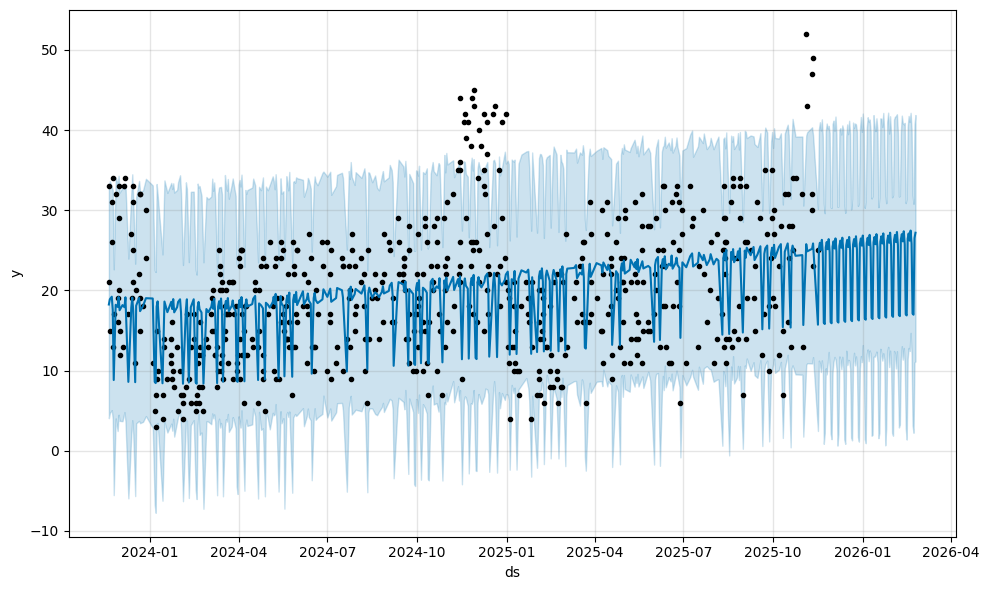

In [39]:
plot1 = m.plot(forecast)

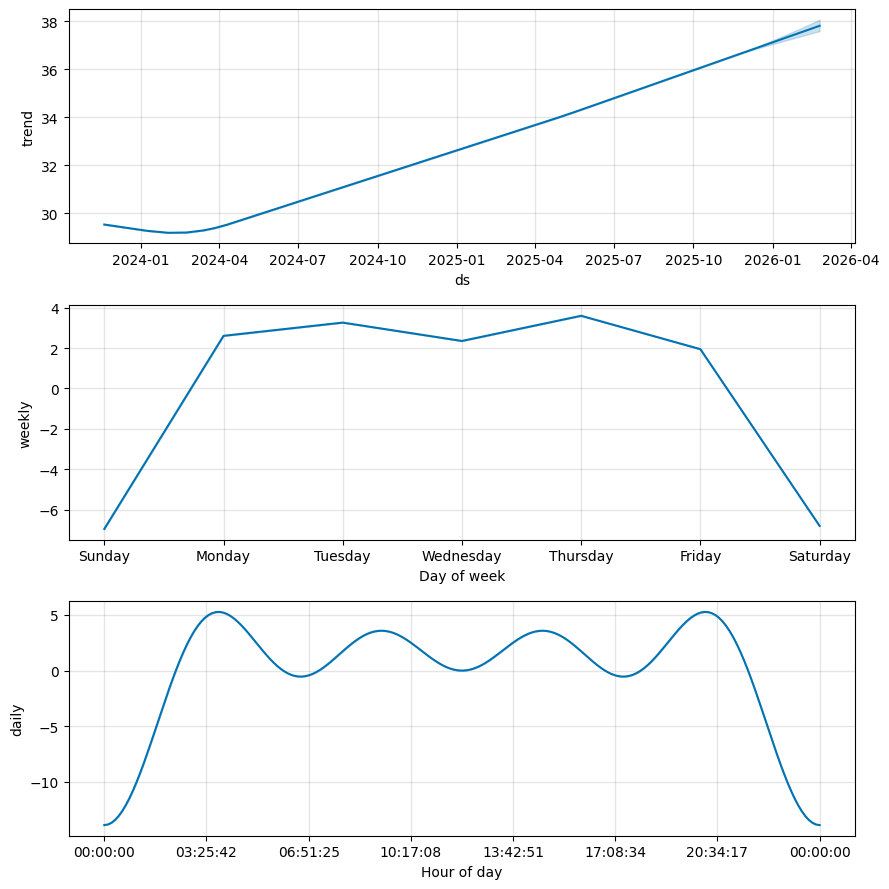

In [40]:
plot2 = m.plot_components(forecast)